# Vacancy Analysis

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Technology Stack Analysis

### Task:
- Analyze the technology stacks mentioned in job listings to identify commonly required skills.
- Determine the frequency of specific technologies (e.g., SQL, Django, Docker) to understand their popularity among employers.

In [3]:
vacancy_df = pd.read_csv("data/python.csv")
vacancy_df = vacancy_df.dropna()

vacancy_df.head()

,title,location,stack,url
0,Backend Software Engineer (Python) — Relocatio...,"за кордоном, віддалено","['SQL', 'Django', 'Docker', 'Ansible', 'TeamCi...",https://jobs.dou.ua/companies/revolut/vacancie...
1,Senior Software Engineer (Python),віддалено,"['SQL', 'FastAPI', 'Kubernetes', 'AsyncIO']",https://jobs.dou.ua/companies/competera/vacanc...
2,Senior Python Developer,"Київ, Дніпро, Запоріжжя, віддалено","['Ansible', 'Git', 'CI/CD', 'SOLID']",https://jobs.dou.ua/companies/the-gravity-agen...
3,Experienced React and python developer,віддалено,"['SQL', 'Docker', 'Git', 'Requests', 'REST']",https://jobs.dou.ua/companies/windsor-ai/vacan...
4,Fullstack Python/React Developer,Запоріжжя,"['SQL', 'Django', 'Flask', 'FastAPI', 'MongoDB...",https://jobs.dou.ua/companies/elementica/vacan...


In [4]:
stack_series = vacancy_df["stack"]

stack_df = pd.DataFrame(stack_series.str.strip("['']").str.split("', '").explode())

technology_counts = stack_df.value_counts()
technology_counts = technology_counts.reset_index().set_index("stack")

technology_counts.head()

,count
stack,
SQL,68
REST,52
Git,45
Docker,43
Django,41


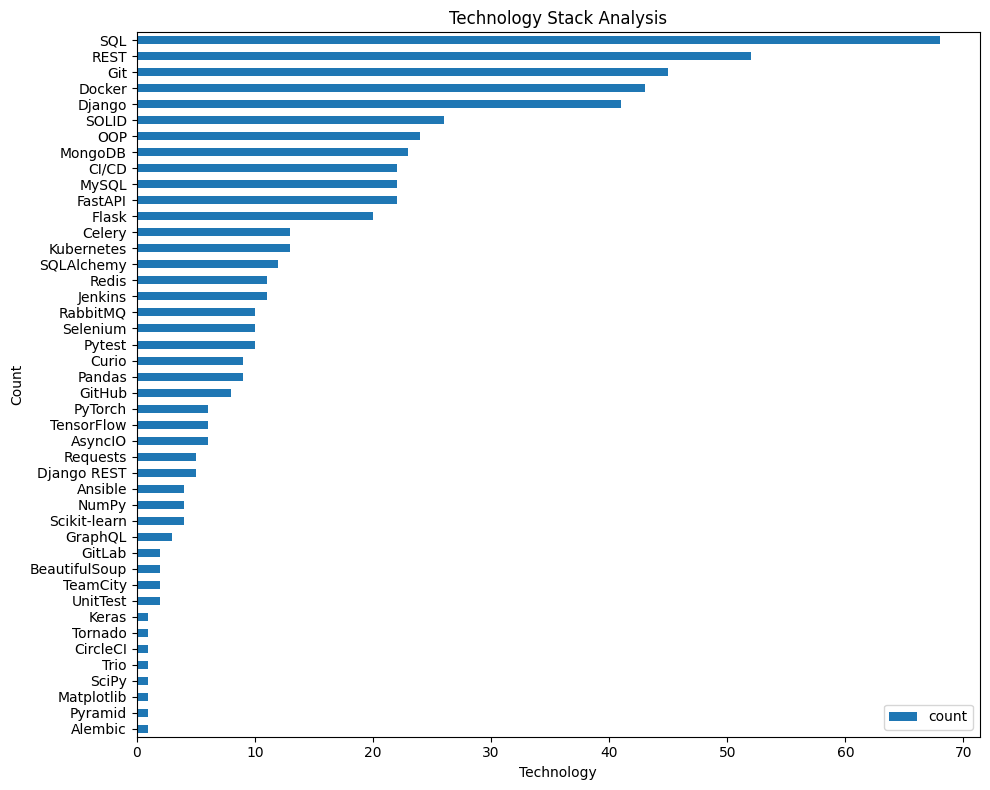

In [17]:
def create_bar_chart(data: pd.Series, xlabel: str, ylabel: str, title: str) -> None:
    data = data.sort_values(by="count")
    data.plot(kind="barh", figsize=(10, 8))
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    plt.margins(y=0.9)
    plt.xticks()
    plt.tight_layout()
    
    plt.show()

create_bar_chart(technology_counts, "Technology", "Count", "Technology Stack Analysis")

### Location Analysis

#### Location Analysis:
- Count the number of job listings by location.
- Visualize the distribution of job listings on a chart.
- Analyze the popularity of different locations for job opportunities.

In [9]:
location_series = vacancy_df["location"]

location_df = pd.DataFrame(location_series.str.split(", ").explode())

length = 25
shorten_location = pd.Series(
    label[:length] + "..."
    if len(label) > length else label
    for label in location_df["location"]
)
shorten_location.head()

0    за кордоном
1      віддалено
2      віддалено
3           Київ
4         Дніпро
dtype: object

In [19]:
location_df["location"] = shorten_location
location_counts = location_df.value_counts()
location_counts = location_counts.reset_index().set_index("location")

location_counts.head()

,count
location,
віддалено,100
Київ,29
Львів,17
Дніпро,10
Кишинів (Молдова),10


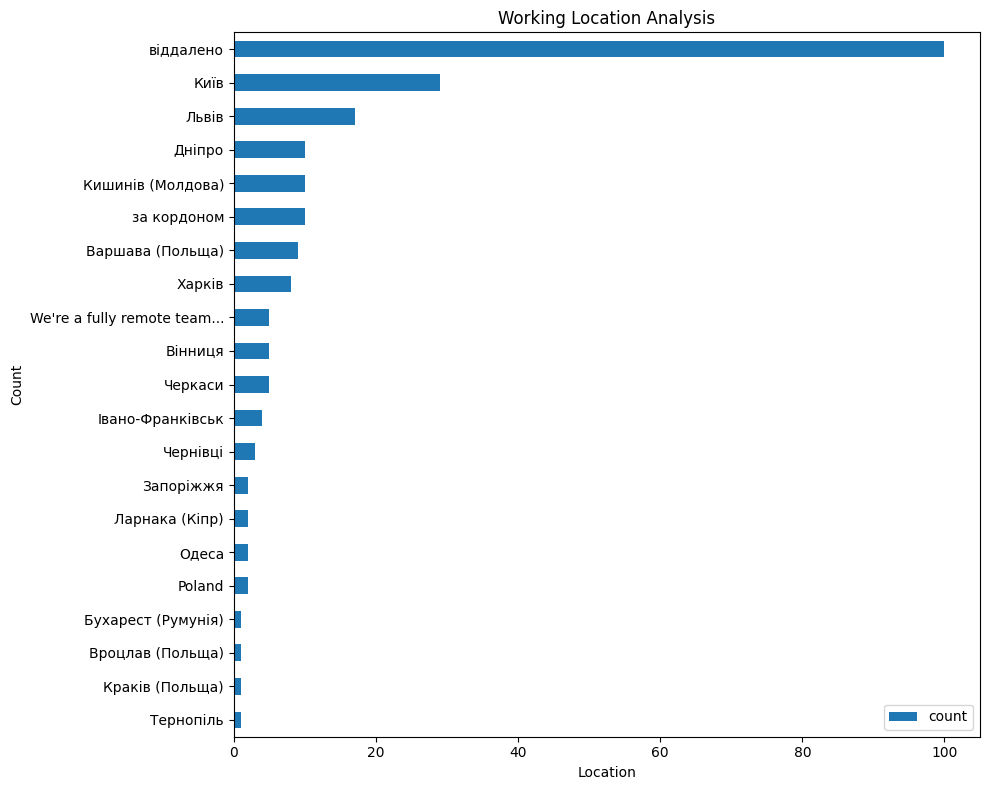

In [20]:
create_bar_chart(location_counts, "Location", "Count", "Working Location Analysis")